In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os
from dateutil.parser import parse
import datetime
from datetime import datetime
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/FAANG stocks/

/content/drive/My Drive/FAANG stocks


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
all_stocks = pd.read_csv("All_stocks.csv")

In [6]:
all_stocks.sort_values(by='Date', ascending = True, inplace = True) 


In [7]:
faang_data = all_stocks

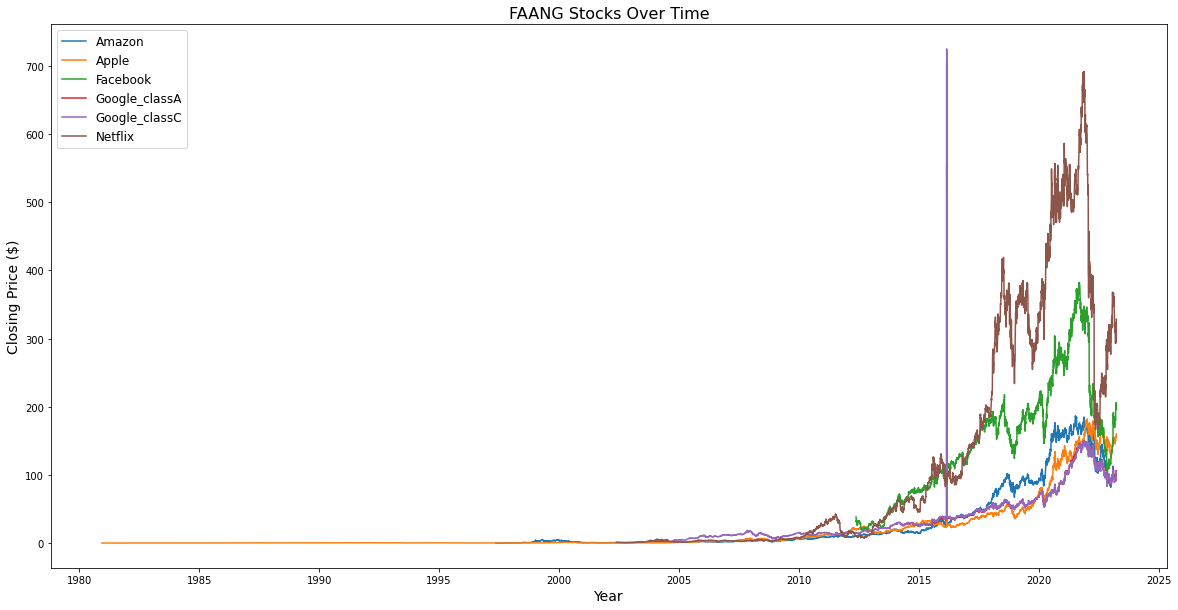

In [8]:

# convert the 'Date' column to datetime format
faang_data['Date'] = pd.to_datetime(faang_data['Date'])

# group the data by 'Name'
grouped_data = faang_data.groupby('Name')

# create a line plot for each company
plt.figure(figsize=(20,10)) # set the figure size
for name, group in grouped_data:
    plt.plot(group['Date'], group['Close'], label=name)

# set the x-axis label and title
plt.xlabel("Year", fontsize=14) # increase font size of x-axis label
plt.ylabel("Closing Price ($)", fontsize=14) # increase font size of y-axis label
plt.title("FAANG Stocks Over Time", fontsize=16) # increase font size of title

# add a legend to the plot
plt.legend(fontsize=12) # increase font size of legend

# display the plot
plt.show()


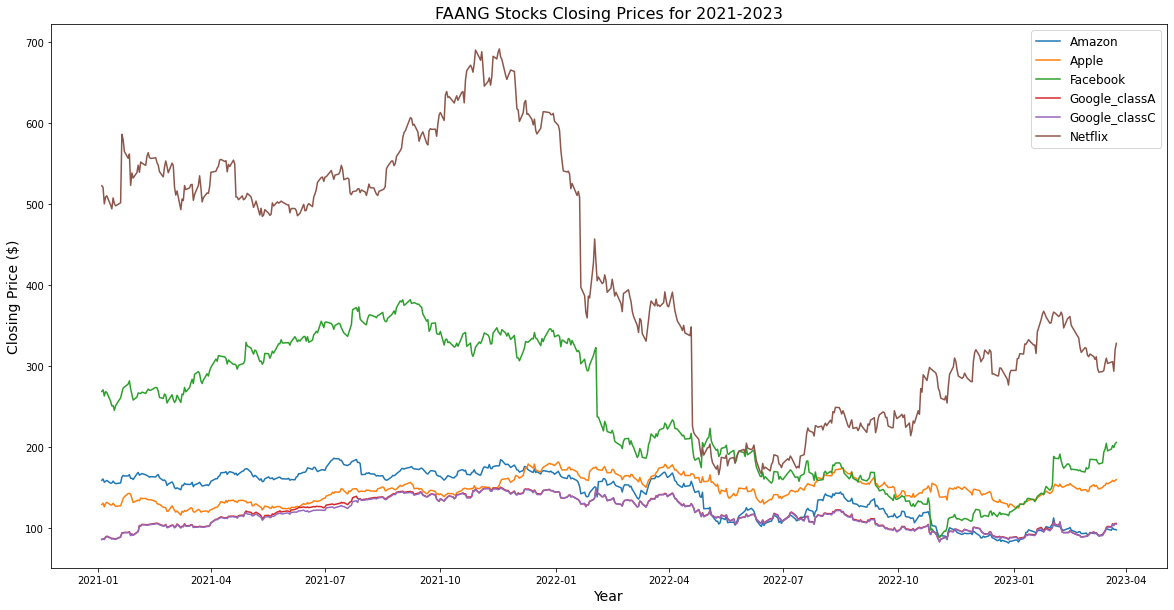

In [9]:
# filter the data to only include the years 2021, 2022, and 2023
faang_data2 = faang_data[(faang_data['Date'].dt.year >= 2021) & (faang_data['Date'].dt.year <= 2023)]

# group the data by 'Name'
grouped_data = faang_data2.groupby('Name')

# create a line plot for each company
plt.figure(figsize=(20,10)) # set the figure size
for name, group in grouped_data:
    plt.plot(group['Date'], group['Close'], label=name)

# set the x-axis label and title
plt.xlabel("Year", fontsize=14)
plt.ylabel("Closing Price ($)", fontsize=14)
plt.title("FAANG Stocks Closing Prices for 2021-2023", fontsize=16)

# add a legend to the plot
plt.legend(fontsize=12)

# display the plot
plt.show()

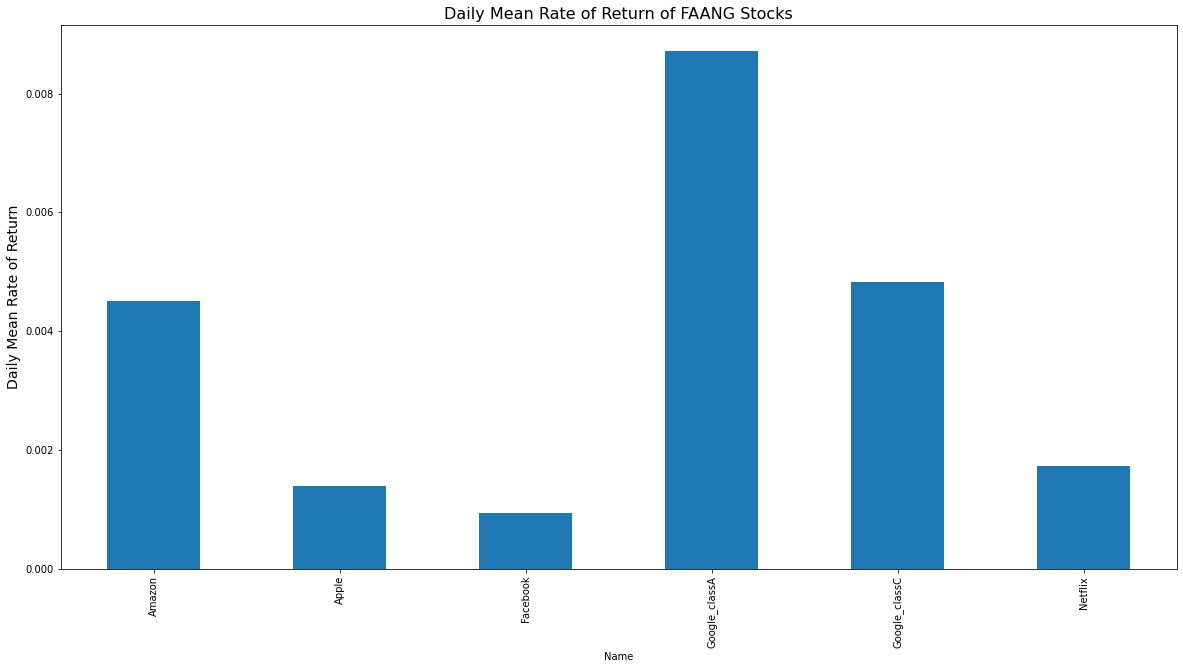

In [10]:
# calculate daily rate of return for each company
daily_return_data = pd.DataFrame()
for name in faang_data['Name'].unique():
    company_data = faang_data[faang_data['Name'] == name]
    company_data['Daily Return'] = company_data['Close'].pct_change()
    daily_return_data = daily_return_data.append(company_data)

# group the data by 'Name' to calculate mean rate of return for each company
grouped_data = daily_return_data.groupby('Name')
mean_return = grouped_data['Daily Return'].mean()

# create a bar plot of mean rate of return
plt.figure(figsize=(20,10)) # set the figure size
mean_return.plot(kind='bar')

# set the y-axis label and title
plt.ylabel("Daily Mean Rate of Return", fontsize=14)
plt.title("Daily Mean Rate of Return of FAANG Stocks", fontsize=16)

# display the plot
plt.show()

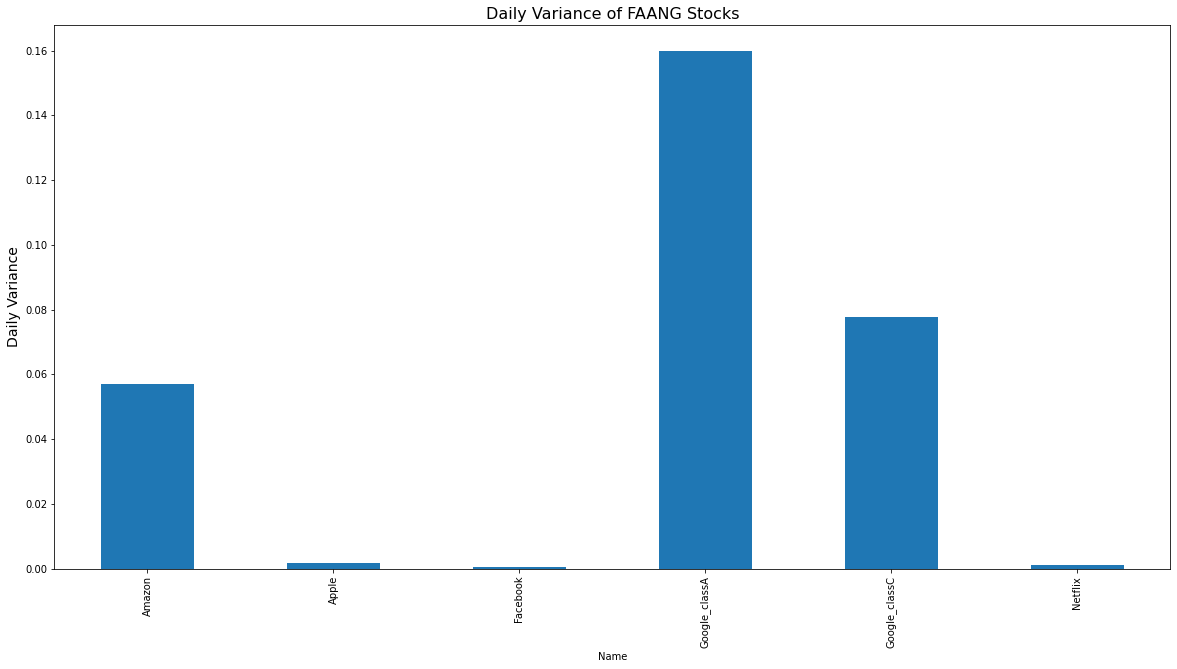

In [11]:
variance = grouped_data['Daily Return'].var()

# create a bar plot of variance
plt.figure(figsize=(20,10)) # set the figure size
variance.plot(kind='bar')

# set the y-axis label and title
plt.ylabel("Daily Variance", fontsize=14)
plt.title("Daily Variance of FAANG Stocks", fontsize=16)

# display the plot
plt.show()

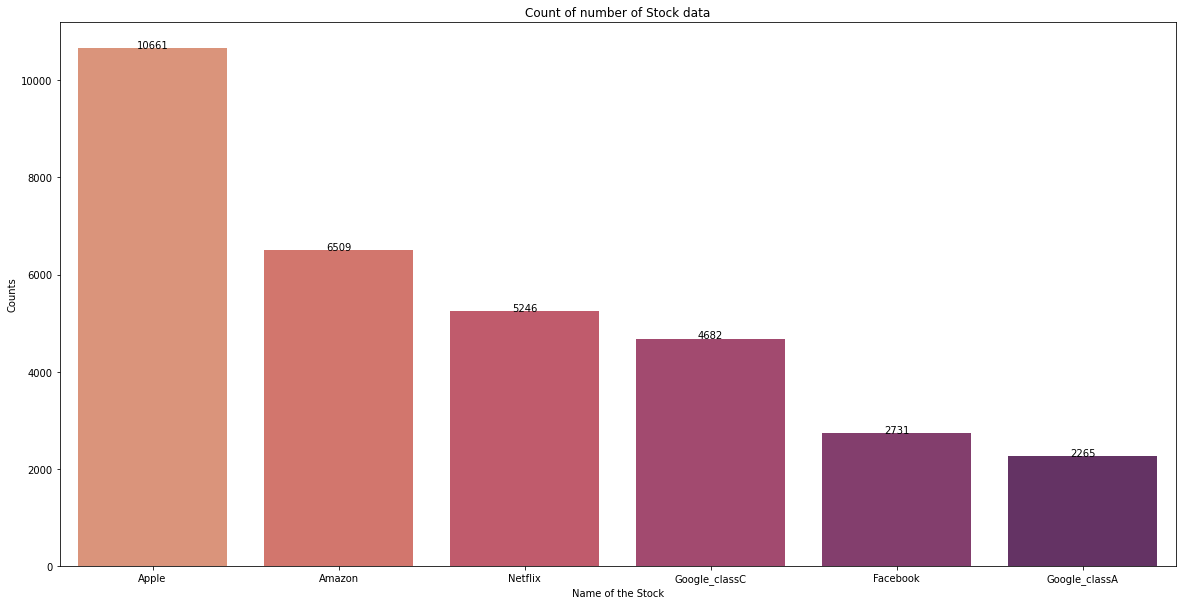

In [13]:
##Visulaizing the count of Daily Stock data.
labels=faang_data['Name'].value_counts().index
values=faang_data['Name'].value_counts().values
fig, ax = plt.subplots(figsize =(20,10))
a = sns.countplot(data=faang_data, x='Name', palette='flare')
a.set(xlabel='Name of the Stock', ylabel='Counts', title='Count of number of Stock data');
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center");